# AM205 HW1 -JiawenTong

In [2]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Problem 1

The polynomial's coefficients for x^3, x^2, x, and constant bias are: 
[-0.16666667  1.         -0.83333333  0.        ]


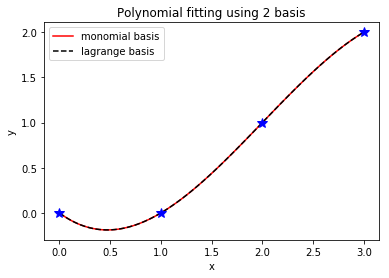

In [3]:
# A cubic polynomial
def cubic_poly(x, b):
    z = b[0]
    for i in range(1, n+1):
        z *= x
        z += b[i]
    return z

# Interpolant polynomial using Lagrange basis
def lagrange(m, xd, yd):
    ret = 0
    for k in range(0, n+1):
        Lk = 1
        for i in range(0, n+1):
            if k == i: 
                continue
            Lk *= (m-xd[i])/(xd[k]-xd[i])
        ret += yd[k] * Lk
    return ret

# degree of the interpolant polynomial
n = 3 

# Data points
x = np.array([0., 1., 2., 3.])
y = np.array([0., 0., 1., 2.])

# Solve b using monomial basis
V = np.vander(x)
b = np.linalg.solve(V, y)
print('The polynomial\'s coefficients for x^3, x^2, x, and constant bias are: ')
print(b)

# Plot fitting result using 2 type of basis
X = np.linspace(0,3,100)
Y_cubic = np.array([cubic_poly(XX, b) for XX in X])
Y_lagrange = np.array([lagrange(XX, x, y) for XX in X])
plt.plot(X, Y_cubic, 'r-', label='monomial basis')
plt.plot(X, Y_lagrange, 'k--', label='lagrange basis')

# Plot the raw data points
for a, b in zip(x, y):
    plt.plot([a], [b], marker='*', markersize=10, color="blue")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial fitting using 2 basis')
plt.legend()
plt.show()

## Problem 2  
### (a) 

Data points for x_cheb and y_cheb are:
[0.9238795325112867, 0.38268343236508984, -0.3826834323650897, -0.9238795325112867]
[ 40.42402035   5.08672981   2.36615976   6.37041812]


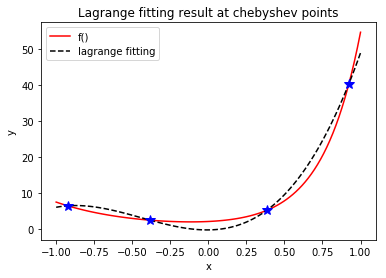

In [3]:
# Interpolant polynomial using Lagrange basis
def lagrange(m, xd, yd):
    ret = 0
    for k in range(0, n+1):
        Lk = 1
        for i in range(0, n+1):
            if k == i: 
                continue
            Lk *= (m-xd[i])/(xd[k]-xd[i])
        ret += yd[k] * Lk
    return ret

# Get chebyshev points for degree N
def chebyshev_points(N):
    ret = []
    for j in range(0, N):
        ret.append(cos((2*j+1)*pi/(2*N)))
    return ret

# The fuction to fit
def f(x):
    return exp(4*x)+exp(-2*x)

# degree of the interpolant polynomial
n = 3 

# Data points
x_cheb = chebyshev_points(4)
y_cheb = np.array([f(xx) for xx in x_cheb])
print('Data points for x_cheb and y_cheb are:')
print(x_cheb)
print(y_cheb)

# Plot lagrange fitting result at chebyshev points & the raw function over [-1,1]
X_lin = np.linspace(-1, 1, 100)
Y_f = np.array([f(XX) for XX in X_lin])
Y_lagrange = np.array([lagrange(XX, x_cheb, y_cheb) for XX in X_lin])
plt.plot(X_lin, Y_f, 'r-', label='f()')
plt.plot(X_lin, Y_lagrange, 'k--', label='lagrange fitting')

# Plot the raw data points
for a, b in zip(x_cheb, y_cheb):
    plt.plot([a], [b], marker='*', markersize=10, color="blue")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange fitting result at chebyshev points')
plt.legend()
plt.show()

### (b)

The infinity norm for function (f-p3) is:  5.75190850272


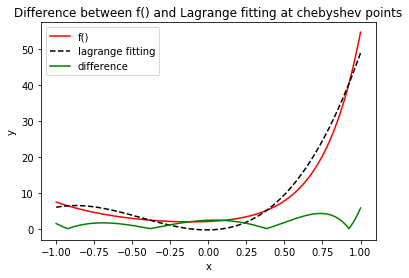

In [4]:
# Sampling 1000 points at linearly equal intervals for f() and p3() 
X_sample = np.linspace(-1, 1, 1000)
Y_f = np.array([f(XX) for XX in X_sample])
Y_lagrange = np.array([lagrange(XX, x_cheb, y_cheb) for XX in X_sample])
diff = np.array(abs(Y_f-Y_lagrange))
diff_norm = max(np.array(abs(Y_f-Y_lagrange)))
print('The infinity norm for function (f-p3) is: ', diff_norm)

# Plot f() and p3() and their absolute difference
plt.plot(X_sample, Y_f, 'r-', label='f()')
plt.plot(X_sample, Y_lagrange, 'k--', label='lagrange fitting')
plt.plot(X_sample, diff, 'g-', label='difference')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Difference between f() and Lagrange fitting at chebyshev points')
plt.legend()
plt.show()

### (d)

New data points x_new, y_new are:
[-0.95 -0.45  0.45  0.95]
[  6.70826521   2.624902     6.45621712  44.85075311]
The infinity norm for function (f-p3_2) is:  4.48381276065


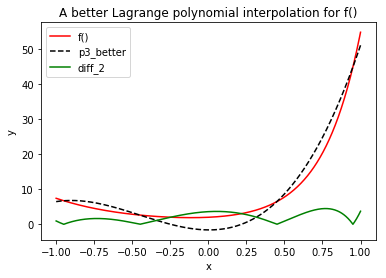

In [5]:
# Hand pick a new set of 4 data points to construct a better Lagrange polynomial interpolation
x_new = np.array([-0.95, -0.45, 0.45, 0.95])
y_new = np.array([f(xx) for xx in x_new])

print('New data points x_new, y_new are:')
print(x_new)
print(y_new)

X_sample = np.linspace(-1, 1, 1000)
Y_f = np.array([f(XX) for XX in X_sample])
Y_p3_2 = np.array([lagrange(XX, x_new, y_new) for XX in X_sample])
diff_2 = np.array(abs(Y_f-Y_p3_2))
diff_norm_2 = max(np.array(abs(Y_f-Y_p3_2)))
print('The infinity norm for function (f-p3_2) is: ', diff_norm_2)

plt.plot(X_sample, Y_f, 'r-', label='f()')
plt.plot(X_sample, Y_p3_2, 'k--', label='p3_better')
plt.plot(X_sample, diff_2, 'g-', label='diff_2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('A better Lagrange polynomial interpolation for f()')
plt.legend()
plt.show()

## Problem 4

### (a) (b)

In [6]:
# The 4 basis cubic polynomials used in class note
def c0(x):
    return x*x*(3-2*x)
def c1(x):
    return -x*x*(1-x)
def c2(x):
    return (x-1)*(x-1)*x
def c3(x):
    return 2*x*x*x-3*x*x+1

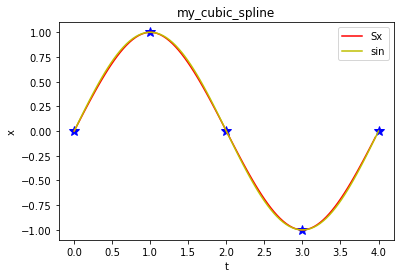

In [7]:
# Cubic spline with coefficients as my results of fitting (0,0),(1,1),(2,0),(3,-1)
def my_cubic_spline(x):
    if x>=0 and x<1:
        return c0(x)+3/2*c2(x)
    if x>=1 and x<2:
        return -3/2*c1(x-1)+c3(x-1)
    if x>=2 and x<3:
        return -c0(x-2)-3/2*c2(x-2)
    if x>=3 and x<4:
        return 3/2*c1(x-3)-c3(x-3)

# Data points
t = np.array([0., 1., 2., 3., 4])
x = np.array([0., 1., 0., -1., 0])
def f_sin(t):
    return sin(t*pi/2)

# Plot the raw data points
for a, b in zip(t, x):
    plt.plot([a], [b], marker='*', markersize=10, color="blue")
        
# Plot cubic spline & sin(t*pi/2)
t_lin = np.linspace(0, 4, 100)
Sx = np.array([my_cubic_spline(tt) for tt in t_lin])
sin_x = np.array([f_sin(tt) for tt in t_lin])
plt.plot(t_lin, Sx, 'r-', label='Sx')
plt.plot(t_lin, sin_x, 'y-', label='sin')
plt.title('my_cubic_spline')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

### (c)

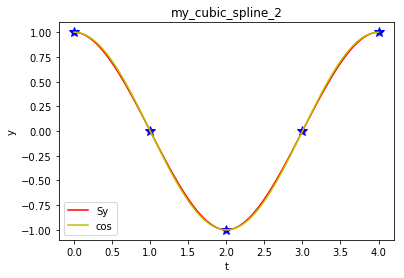

In [8]:
# Cubic spline with coefficients as my results of fitting (0,1),(1,0),(2,-1),(3,0)
def my_cubic_spline_2(x):
    if x>=0 and x<1:
        return -3/2*c1(x)+c3(x)
    if x>=1 and x<2:
        return -c0(x-1)-3/2*c2(x-1)
    if x>=2 and x<3:
        return 3/2*c1(x-2)-c3(x-2)
    if x>=3 and x<4:
        return c0(x-3)+3/2*c2(x-3)

# Data points
t = np.array([0., 1., 2., 3., 4])
y = np.array([1., 0., -1., 0., 1])

def f_cos(t):
    return cos(t*pi/2)

# Plot the raw data points
for a, b in zip(t, y):
    plt.plot([a], [b], marker='*', markersize=10, color="blue")

# Plot cubic spline & cos(t*pi/2)
t_lin = np.linspace(0, 4, 100)
Sy = np.array([my_cubic_spline_2(tt) for tt in t_lin])
cos_y = np.array([f_cos(tt) for tt in t_lin])
plt.plot(t_lin, Sy, 'r-', label='Sy')
plt.plot(t_lin, cos_y, 'y-', label='cos')
plt.title('my_cubic_spline_2')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### (d)

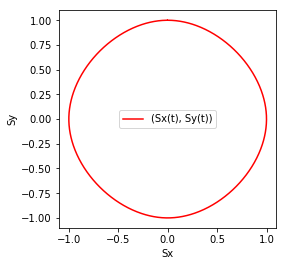

In [9]:
fig = plt.figure()
ax = fig.gca()
t_lin = np.linspace(0, 4, 1000)
x_to_plot = np.array([my_cubic_spline(tt) for tt in t_lin])
y_to_plot = np.array([my_cubic_spline_2(tt) for tt in t_lin])
plt.plot(x_to_plot, y_to_plot, 'r-', label='(Sx(t), Sy(t))')

#x_sin = np.array([f_sin(tt) for tt in t_lin])
#y_cos = np.array([f_cos(tt) for tt in t_lin])
#plt.plot(x_sin, y_cos, 'y-', label='sin/cos curve')

plt.gca().set_aspect('equal')
plt.xlabel('Sx')
plt.ylabel('Sy')
plt.legend()
plt.show()

In [10]:
# Calculate the enclosed area by adding up all small rectangles
N = 10000
t_steps = np.linspace(0, 2, N)
area_enclosed = 0
for i in range(0, N-1):
    x1 = my_cubic_spline(t_steps[i])
    x2 = my_cubic_spline(t_steps[i+1])
    y = my_cubic_spline_2(t_steps[i])
    dx = abs(x1-x2)
    area_enclosed += 2*dx*abs(y)
area_enclosed

3.0499999499900081

In [11]:
print('Relative error of my numerical value of pi is: ', abs(area_enclosed-pi)/pi * 100, '%')

Relative error of my numerical value of pi is:  2.91548630581 %


### Problem 5
#### (a)

In [32]:
from scipy.misc import imsave
from scipy.misc import imread

def load_and_split(img_dir): 
    # Read regular image 
    a = imread(img_dir)
    (y,x,z) = a.shape
    #print(x,y,z)
    #print(a)
    
    # Output each channel
    for k in range(3):
        b = np.zeros((y,x,z))
        #b[:,:,k]=a[:,:,k]/255.0
        b[:,:,k]=a[:,:,k]
        output_dir = img_dir.replace('.png', '')+'_channel'+str(k)+'.png'
        #io.imsave(output_dir, b)
        imsave(output_dir, b)

400 by 300 pixels


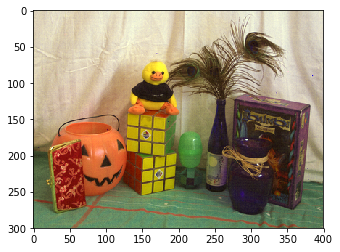

In [33]:
# Using 0-255 scale
load_and_split('objects/regular.png')
load_and_split('objects/low1.png')
load_and_split('objects/low2.png')
load_and_split('objects/low3.png')

A0 = imread('objects/regular_channel0.png')[:, :, 0]
A1 = imread('objects/regular_channel1.png')[:, :, 1] 
A2 = imread('objects/regular_channel2.png')[:, :, 2]

B0 = imread('objects/low1_channel0.png')[:, :, 0]
B1 = imread('objects/low1_channel1.png')[:, :, 1]
B2 = imread('objects/low1_channel2.png')[:, :, 2]

C0 = imread('objects/low2_channel0.png')[:, :, 0]
C1 = imread('objects/low2_channel1.png')[:, :, 1]
C2 = imread('objects/low2_channel2.png')[:, :, 2]

D0 = imread('objects/low3_channel0.png')[:, :, 0]
D1 = imread('objects/low3_channel1.png')[:, :, 1]
D2 = imread('objects/low3_channel2.png')[:, :, 2]

# Check size
(N, M) = A0.shape
print(M, 'by', N, 'pixels')

# Reshape each channel into a M*N by 1 list-like array
A0 = A0.reshape(M*N, )
A1 = A1.reshape(M*N, )
A2 = A2.reshape(M*N, )

B0 = B0.reshape((M*N, 1))
B1 = B1.reshape((M*N, 1))
B2 = B2.reshape((M*N, 1))

C0 = C0.reshape((M*N, 1))
C1 = C1.reshape((M*N, 1))
C2 = C2.reshape((M*N, 1))

D0 = D0.reshape((M*N, 1))
D1 = D1.reshape((M*N, 1))
D2 = D2.reshape((M*N, 1))

# Python linear least quare 'Lstsq' to calculate the 30 params in h0, h1, h2
ones = np.ones((M*N, 1))
X = np.concatenate((B0, B1, B2, C0, C1, C2, D0, D1, D2, ones), axis = 1)
h0 = np.linalg.lstsq(X, A0)[0]
h1 = np.linalg.lstsq(X, A1)[0]
h2 = np.linalg.lstsq(X, A2)[0]

# Put all three reconstructed channels into a M by N 3 channel numpy array
R0 = np.dot(X, h0).reshape((N, M, 1))
R1 = np.dot(X, h1).reshape((N, M, 1))
R2 = np.dot(X, h2).reshape((N, M, 1))
R = np.concatenate((R0, R1, R2), axis = 2)

# Save the array as an image
imsave('objects/reconstruct.png', np.clip(R, 0, 255))
plt.imshow(np.clip(R/255.0, 0, 1))
#plt.imshow(R)

In [34]:
S0 = np.mean(np.square(A0-np.dot(X, h0)))
S1 = np.mean(np.square(A1-np.dot(X, h1)))
S2 = np.mean(np.square(A2-np.dot(X, h2)))
print('The mean square error on the original image for the three channels are: \n', (S0, S1, S2))

S = np.mean(np.square(A0-np.dot(X, h0)) + np.square(A1-np.dot(X, h1)) + np.square(A2-np.dot(X, h2)))/3.
print('Total mean square: ', S)
print('Mean error rate: ', sqrt(S)/255*100, '%')

The mean square error on the original image for the three channels are: 
 (152.5360662684235, 148.37982668906037, 79.60947357867569)
Total mean square:  126.841788845
Mean error rate:  4.416629802816914 %


In [35]:
print('My reconstruction parameters are')
print(h0)
print(h1)
print(h2)

My reconstruction parameters are
[  0.81197402   0.51473525  -0.41834615  -0.13785987   0.06741681
   0.300502     0.48057985  -0.27830102  -0.59472792  17.3193773 ]
[  0.56911652   1.24681112  -0.64012445  -0.24472206   0.26526897
   0.32317837  -0.32582091   0.02593846  -0.44420352  14.96314257]
[ 0.43841706 -0.17996042 -0.23558825 -0.06930897  0.25107695  1.1830199
 -0.37981819 -0.18260174  0.33164883 -2.31665613]


400 by 300 pixels


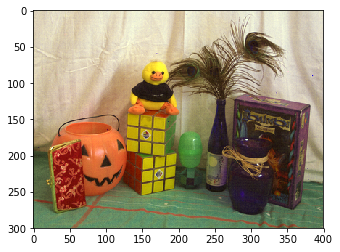

In [38]:
# Using 0-1 scale
load_and_split('objects/regular.png')
load_and_split('objects/low1.png')
load_and_split('objects/low2.png')
load_and_split('objects/low3.png')

A0 = imread('objects/regular_channel0.png')[:, :, 0]/255
A1 = imread('objects/regular_channel1.png')[:, :, 1]/255
A2 = imread('objects/regular_channel2.png')[:, :, 2]/255

B0 = imread('objects/low1_channel0.png')[:, :, 0]/255
B1 = imread('objects/low1_channel1.png')[:, :, 1]/255
B2 = imread('objects/low1_channel2.png')[:, :, 2]/255

C0 = imread('objects/low2_channel0.png')[:, :, 0]/255
C1 = imread('objects/low2_channel1.png')[:, :, 1]/255
C2 = imread('objects/low2_channel2.png')[:, :, 2]/255

D0 = imread('objects/low3_channel0.png')[:, :, 0]/255
D1 = imread('objects/low3_channel1.png')[:, :, 1]/255
D2 = imread('objects/low3_channel2.png')[:, :, 2]/255

# Check size
(N, M) = A0.shape
print(M, 'by', N, 'pixels')

# Reshape each channel into a M*N by 1 list-like array
A0 = A0.reshape(M*N, )
A1 = A1.reshape(M*N, )
A2 = A2.reshape(M*N, )

B0 = B0.reshape((M*N, 1))
B1 = B1.reshape((M*N, 1))
B2 = B2.reshape((M*N, 1))

C0 = C0.reshape((M*N, 1))
C1 = C1.reshape((M*N, 1))
C2 = C2.reshape((M*N, 1))

D0 = D0.reshape((M*N, 1))
D1 = D1.reshape((M*N, 1))
D2 = D2.reshape((M*N, 1))

# Python linear least quare 'Lstsq' to calculate the 30 params in h0, h1, h2
ones = np.ones((M*N, 1))
X = np.concatenate((B0, B1, B2, C0, C1, C2, D0, D1, D2, ones), axis = 1)
h0 = np.linalg.lstsq(X, A0)[0]
h1 = np.linalg.lstsq(X, A1)[0]
h2 = np.linalg.lstsq(X, A2)[0]

# Put all three reconstructed channels into a M by N 3 channel numpy array
R0 = np.dot(X, h0).reshape((N, M, 1))
R1 = np.dot(X, h1).reshape((N, M, 1))
R2 = np.dot(X, h2).reshape((N, M, 1))
R = np.concatenate((R0, R1, R2), axis = 2)

# Save the array as an image
imsave('objects/reconstruct.png', np.clip(R, 0, 1))
#plt.imshow(np.clip(R/255.0, 0, 1))
plt.imshow(np.clip(R, 0, 1))

In [39]:
# Using 0-1 scale
S0 = np.mean(np.square(A0-np.dot(X, h0)))
S1 = np.mean(np.square(A1-np.dot(X, h1)))
S2 = np.mean(np.square(A2-np.dot(X, h2)))
print('The mean square error on the original image for the three channels are: \n', (S0, S1, S2))

S = np.mean(np.square(A0-np.dot(X, h0)) + np.square(A1-np.dot(X, h1)) + np.square(A2-np.dot(X, h2)))/3.
print('Total mean square: ', S)
print('Mean error rate: ', sqrt(S)*100, '%')

The mean square error on the original image for the three channels are: 
 (0.002345806478560915, 0.0022818889148644417, 0.0012242902511138132)
Total mean square:  0.00195066188151
Mean error rate:  4.416629802816914 %


### (b)

400 by 300 pixels


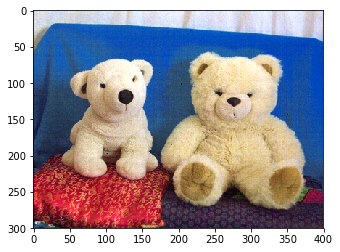

In [40]:
# Using 0-255 scale
load_and_split('bears/low1.png')
load_and_split('bears/low2.png')
load_and_split('bears/low3.png')

# Load in channel 0, 1, and 2 of the regular image
bear_B0 = imread('bears/low1_channel0.png')[:, :, 0]
bear_B1 = imread('bears/low1_channel1.png')[:, :, 1]
bear_B2 = imread('bears/low1_channel2.png')[:, :, 2]

bear_C0 = imread('bears/low2_channel0.png')[:, :, 0]
bear_C1 = imread('bears/low2_channel1.png')[:, :, 1]
bear_C2 = imread('bears/low2_channel2.png')[:, :, 2]

bear_D0 = imread('bears/low3_channel0.png')[:, :, 0]
bear_D1 = imread('bears/low3_channel1.png')[:, :, 1]
bear_D2 = imread('bears/low3_channel2.png')[:, :, 2]

# Check size
(bear_N, bear_M) = bear_B0.shape
print(bear_M, 'by', bear_N, 'pixels')

bear_B0 = bear_B0.reshape((bear_M*bear_N, 1))
bear_B1 = bear_B1.reshape((bear_M*bear_N, 1))
bear_B2 = bear_B2.reshape((bear_M*bear_N, 1))

bear_C0 = bear_C0.reshape((bear_M*bear_N, 1))
bear_C1 = bear_C1.reshape((bear_M*bear_N, 1))
bear_C2 = bear_C2.reshape((bear_M*bear_N, 1))

bear_D0 = bear_D0.reshape((bear_M*bear_N, 1))
bear_D1 = bear_D1.reshape((bear_M*bear_N, 1))
bear_D2 = bear_D2.reshape((bear_M*bear_N, 1))

# Python linear least quare 'Lstsq' to calculate the 30 params in h0, h1, h2
ones = np.ones((bear_M*bear_N, 1))
X_b = np.concatenate((bear_B0, bear_B1, bear_B2, bear_C0, bear_C1, bear_C2, bear_D0, bear_D1, bear_D2, ones), axis = 1)

# Calculate the three reconstructed channels
bear_R0 = np.dot(X_b, h0).reshape((bear_N, bear_M, 1))
bear_R1 = np.dot(X_b, h1).reshape((bear_N, bear_M, 1))
bear_R2 = np.dot(X_b, h2).reshape((bear_N, bear_M, 1))
bear_R = np.concatenate((bear_R0, bear_R1, bear_R2), axis = 2)

# Save the array as an image
imsave('bears/reconstruct.png', np.clip(bear_R, 0, 255))
plt.imshow(np.clip(bear_R/255.0, 0, 1))

In [41]:
# Using 0-255 scale
load_and_split('bears/regular.png')

bear_A0 = imread('bears/regular_channel0.png')[:, :, 0]
bear_A1 = imread('bears/regular_channel1.png')[:, :, 1] 
bear_A2 = imread('bears/regular_channel2.png')[:, :, 2]
flat_bear_R0 = bear_R0.reshape((bear_N, bear_M))
flat_bear_R1 = bear_R1.reshape((bear_N, bear_M))
flat_bear_R2 = bear_R2.reshape((bear_N, bear_M))

T0 = np.mean(np.square(bear_A0-flat_bear_R0))
T1 = np.mean(np.square(bear_A1-flat_bear_R1))
T2 = np.mean(np.square(bear_A2-flat_bear_R2))
print('The mean square error on a new image for the three channels are: \n', (T0, T1, T2))

T = np.mean(np.square(bear_A0-flat_bear_R0) + np.square(bear_A1-flat_bear_R1) + np.square(bear_A2-flat_bear_R2))/3.
print('Total mean square: ', T)
print('Mean error rate: ', sqrt(T)/255*100, '%')

The mean square error on a new image for the three channels are: 
 (490.69037782380695, 763.44601208382812, 237.23412216411015)
Total mean square:  497.123504024
Mean error rate:  8.743633958371525 %


400 by 300 pixels


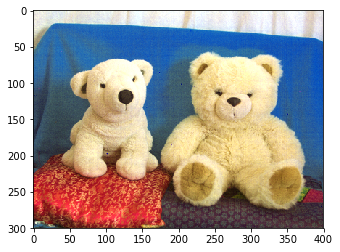

In [42]:
# Using 0-1 scale
load_and_split('bears/low1.png')
load_and_split('bears/low2.png')
load_and_split('bears/low3.png')

# Load in channel 0, 1, and 2 of the regular image
bear_B0 = imread('bears/low1_channel0.png')[:, :, 0]/255
bear_B1 = imread('bears/low1_channel1.png')[:, :, 1]/255
bear_B2 = imread('bears/low1_channel2.png')[:, :, 2]/255

bear_C0 = imread('bears/low2_channel0.png')[:, :, 0]/255
bear_C1 = imread('bears/low2_channel1.png')[:, :, 1]/255
bear_C2 = imread('bears/low2_channel2.png')[:, :, 2]/255

bear_D0 = imread('bears/low3_channel0.png')[:, :, 0]/255
bear_D1 = imread('bears/low3_channel1.png')[:, :, 1]/255
bear_D2 = imread('bears/low3_channel2.png')[:, :, 2]/255

# Check size
(bear_N, bear_M) = bear_B0.shape
print(bear_M, 'by', bear_N, 'pixels')

bear_B0 = bear_B0.reshape((bear_M*bear_N, 1))
bear_B1 = bear_B1.reshape((bear_M*bear_N, 1))
bear_B2 = bear_B2.reshape((bear_M*bear_N, 1))

bear_C0 = bear_C0.reshape((bear_M*bear_N, 1))
bear_C1 = bear_C1.reshape((bear_M*bear_N, 1))
bear_C2 = bear_C2.reshape((bear_M*bear_N, 1))

bear_D0 = bear_D0.reshape((bear_M*bear_N, 1))
bear_D1 = bear_D1.reshape((bear_M*bear_N, 1))
bear_D2 = bear_D2.reshape((bear_M*bear_N, 1))

# Python linear least quare 'Lstsq' to calculate the 30 params in h0, h1, h2
ones = np.ones((bear_M*bear_N, 1))
X_b = np.concatenate((bear_B0, bear_B1, bear_B2, bear_C0, bear_C1, bear_C2, bear_D0, bear_D1, bear_D2, ones), axis = 1)

# Calculate the three reconstructed channels
bear_R0 = np.dot(X_b, h0).reshape((bear_N, bear_M, 1))
bear_R1 = np.dot(X_b, h1).reshape((bear_N, bear_M, 1))
bear_R2 = np.dot(X_b, h2).reshape((bear_N, bear_M, 1))
bear_R = np.concatenate((bear_R0, bear_R1, bear_R2), axis = 2)

# Save the array as an image
imsave('bears/reconstruct.png', np.clip(bear_R, 0, 1))
plt.imshow(np.clip(bear_R, 0, 1))

In [43]:
# Using 0-1 scale
load_and_split('bears/regular.png')

bear_A0 = imread('bears/regular_channel0.png')[:, :, 0]/255
bear_A1 = imread('bears/regular_channel1.png')[:, :, 1]/255
bear_A2 = imread('bears/regular_channel2.png')[:, :, 2]/255
flat_bear_R0 = bear_R0.reshape((bear_N, bear_M))
flat_bear_R1 = bear_R1.reshape((bear_N, bear_M))
flat_bear_R2 = bear_R2.reshape((bear_N, bear_M))

T0 = np.mean(np.square(bear_A0-flat_bear_R0))
T1 = np.mean(np.square(bear_A1-flat_bear_R1))
T2 = np.mean(np.square(bear_A2-flat_bear_R2))
print('The mean square error on a new image for the three channels are: \n', (T0, T1, T2))

T = np.mean(np.square(bear_A0-flat_bear_R0) + np.square(bear_A1-flat_bear_R1) + np.square(bear_A2-flat_bear_R2))/3.
print('Total mean square: ', T)
print('Mean error rate: ', sqrt(T)*100, '%')

The mean square error on a new image for the three channels are: 
 (0.0066375130808873526, 0.0075113902958993907, 0.0030578927545891203)
Total mean square:  0.00573559871046
Mean error rate:  7.573373561668949 %
